<a href="https://colab.research.google.com/github/Lucky456F/Tamizan-Skills-Internship-ML-AI-PROJECT-2/blob/main/Project_2_Handwritten_Digit_Recognition_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


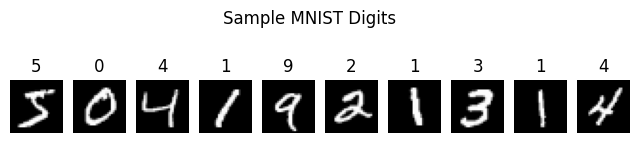

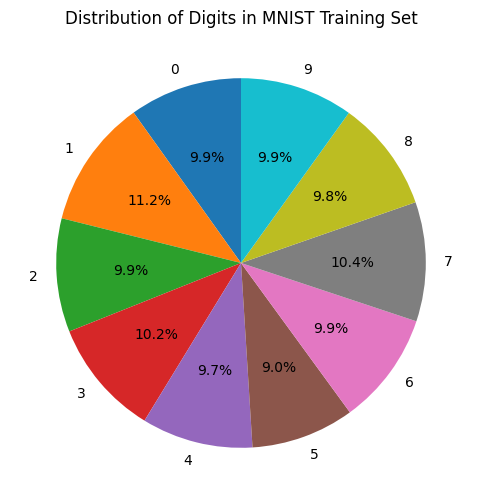

In [ ]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualize sample digits
plt.figure(figsize=(8,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])
plt.suptitle("Sample MNIST Digits")
plt.show()

# Plot class distribution as a pie chart
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(6,6))
plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("tab10"))
plt.title("Distribution of Digits in MNIST Training Set")
plt.show()


In [ ]:
# Reshape for CNN input and normalize
X_train = X_train.reshape(-1,28,28,1).astype('float32') / 255
X_test = X_test.reshape(-1,28,28,1).astype('float32') / 255

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=128,
                    validation_split=0.1, verbose=2)


Epoch 1/10
422/422 - 50s - 119ms/step - accuracy: 0.9054 - loss: 0.3126 - val_accuracy: 0.9842 - val_loss: 0.0578
Epoch 2/10
422/422 - 73s - 172ms/step - accuracy: 0.9726 - loss: 0.0953 - val_accuracy: 0.9858 - val_loss: 0.0481
Epoch 3/10
422/422 - 40s - 96ms/step - accuracy: 0.9797 - loss: 0.0692 - val_accuracy: 0.9873 - val_loss: 0.0433
Epoch 4/10
422/422 - 41s - 98ms/step - accuracy: 0.9824 - loss: 0.0581 - val_accuracy: 0.9898 - val_loss: 0.0357
Epoch 5/10
422/422 - 40s - 96ms/step - accuracy: 0.9844 - loss: 0.0507 - val_accuracy: 0.9898 - val_loss: 0.0378
Epoch 6/10
422/422 - 41s - 98ms/step - accuracy: 0.9876 - loss: 0.0409 - val_accuracy: 0.9903 - val_loss: 0.0348
Epoch 7/10
422/422 - 41s - 96ms/step - accuracy: 0.9887 - loss: 0.0368 - val_accuracy: 0.9917 - val_loss: 0.0317
Epoch 8/10
422/422 - 41s - 96ms/step - accuracy: 0.9890 - loss: 0.0347 - val_accuracy: 0.9903 - val_loss: 0.0317
Epoch 9/10
422/422 - 42s - 101ms/step - accuracy: 0.9898 - loss: 0.0315 - val_accuracy: 0.9915

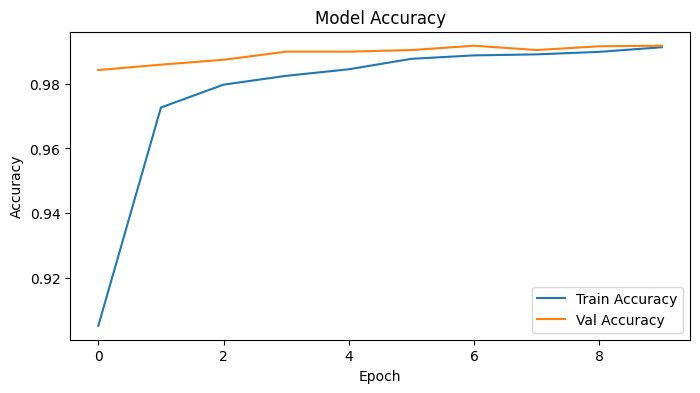

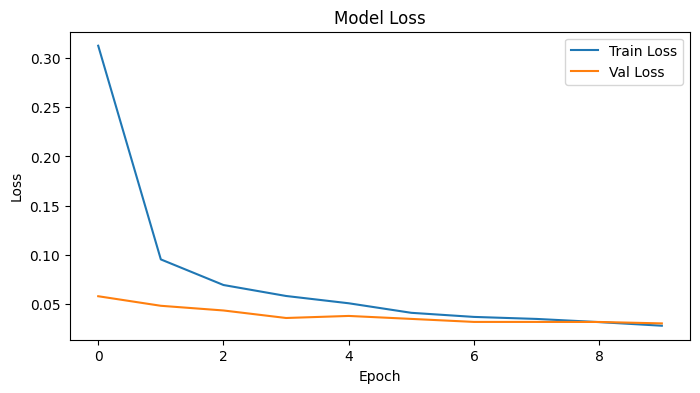

In [ ]:
# Accuracy plot
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Test accuracy: 0.9922
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


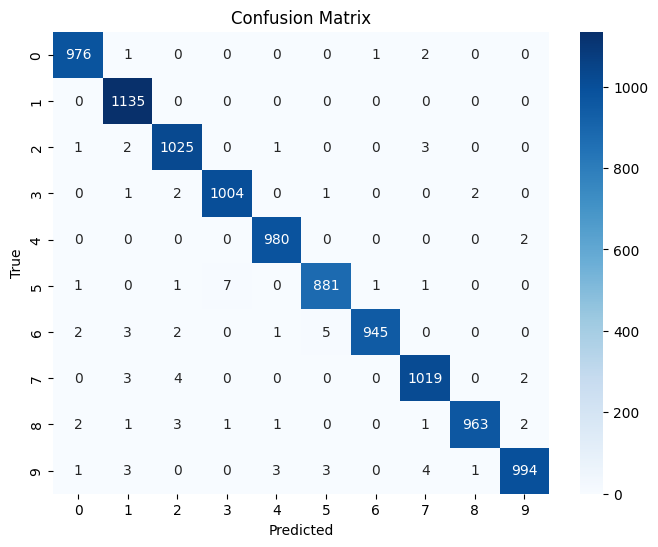

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Predict and show confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique, yticklabels=unique)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))
